# Artificial Neural Networks AM41AN

## Week 9 Radial Basis Functions

## Task 1

Implement the Error Back-Propagation (EBP) algorithm to train the weights of a network with one hidden layer compossed by $K$ sigmoidal units.
The task is to approximate a function $f:\mathscr{X}\subset\mathbb{R}^2\to\mathbb{R}$



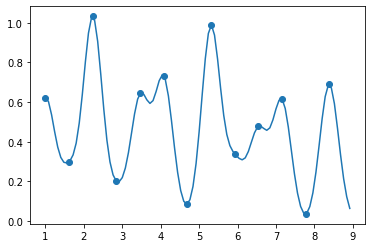

In [2]:
##############
### Task 1 ###
##############

import numpy as np                              # Imports the libraries
import matplotlib.pyplot as plt  
import random as rn
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import axes3d, Axes3D

def function(x):                               # Function that generates the average behavior
    return  0.5 + 0.4 * np.sin(2 * np.pi * x)

def data(a,b,N,sigma):                         # Data set generated grom the expected behavior plus Gaussian noise with parameter sigma
    xx = np.arange(a,b,(b - a) / N)
    ff = function(xx) + np.random.normal(0, sigma, size=N)
    return(xx,ff)

def Gauss(x,mu,sig):                           # Uni-variate Gaussian distribution
    return  np.exp(- (x - mu) ** 2 / (2 * sig)) / np.sqrt(2 * np.pi * sig)

def weights(x1,y1,noise):                      # Computation of the weights for the interpolation problem 
    l = len(x1)
    G = np.zeros((l,l))
    for i in range(l):
        for j in range(i,l):
            G[i,j] = Gauss(x1[i],x1[j],noise)
            G[j,i] = G[i,j]
    A = np.linalg.inv(G)                       # Solves the set of linear equations by taking the inverse of the Gram matrix
    z = np.dot(A,y1)
    return(z)

def estimate(x,xv,wv,noise):                   # Implementation of the Gaussian radial basis functions though a network with weights wv
    c = 0
    l = len(xv)
    for i in range(l):
        c = c + wv[i] * Gauss(x,xv[i],noise)
    return(c)

def test(a,b,L,sigma,sigmaT,Grid):             # All together
    xx , yy = data(a,b,L,sigma)
    w = weights(xx,yy,sigmaT)
    XX = np.arange(a,b,(b - a) / Grid)
    YY = estimate(XX,xx,w,sigmaT)
    plt.plot(XX,YY)
    plt.scatter(xx,yy)
    plt.show()
    
test(1,9,13,0.1,0.06,100)

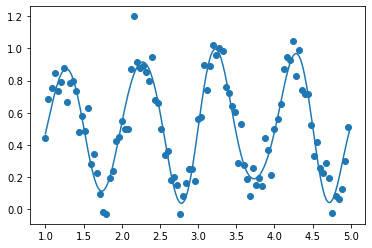

In [3]:
##############
### Task 2 ###
##############

import math

def weightsR(x1,y1,K,noise,eta,MaxIt):                 # Computation of the weights for a larger data set. First the K centers are computed.
    l = len(x1)
    f = math.floor(l / K)
    mu = np.zeros(K)
    for k in range(K):
        for j in range(f):
            mu[k] = mu[k] + x1[k * f + j]
    mu = mu / f
    ww = np.random.normal(0, 0.1, size = K)            # The weights are obtained by gradient decent training not by inverting a Gram matrix
    for it in range(MaxIt):
        for n in range(l):
            G = np.zeros(K)
            for k in range(K):
                G[k] = Gauss(x1[n],mu[k],noise)
            delta = eta * (np.dot(G,ww) - y1[n])
            ww = ww - delta * G
    return(ww,mu)

def test1(a,b,L,sigma,K,sigmaT,eta,Nit,Grid):        # All together
    xx , yy = data(a,b,L,sigma)
    w , mm = weightsR(xx,yy,K,sigmaT,eta,Nit)
    XX = np.arange(a,b,(b-a)/Grid)
    YY = estimate(XX,mm,w,sigmaT)
    plt.plot(XX,YY)
    plt.scatter(xx,yy)
    plt.show()
    
test1(1,5,100,0.1,20,0.08,0.2,800,300)

